In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('breast-cancer.data') as input_file:
    lines = input_file.readlines()
    #print(lines)
    newLines = []
    for line in lines:
        newLine = line.strip().split(",")
        #print(newLine)
        newLines.append(newLine)


In [4]:
df = pd.DataFrame(newLines) 

In [5]:
df.columns=["id","thickness", "cellsize", "cellshape", "madhesion", "secellsize", "barenuclei", "chromatin", "nucleoli", "mitosis","Class"]

In [6]:
#preprocessing 
df.head()

,id,thickness,cellsize,cellshape,madhesion,secellsize,barenuclei,chromatin,nucleoli,mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
#preprocessing 

#replacing target values with 0- benign , 1- malignant
df.Class.replace(['2', '4'], [0, 1], inplace=True)



In [8]:
#dealing with missing values
df['barenuclei'].value_counts()
#16 instances of ? is oberserved

#replacing these ? with median of the columns
#med=df['barenuclei'].median()
df['barenuclei'] = df['barenuclei'].replace('?', 0)
med=df['barenuclei'].median()
df['barenuclei'] = df['barenuclei'].replace('?', med)

In [9]:
df = df.astype(float)

In [10]:
#normalizations

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

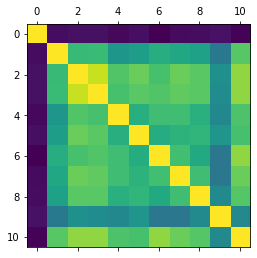

In [11]:
plt.matshow(df.corr())
plt.show()

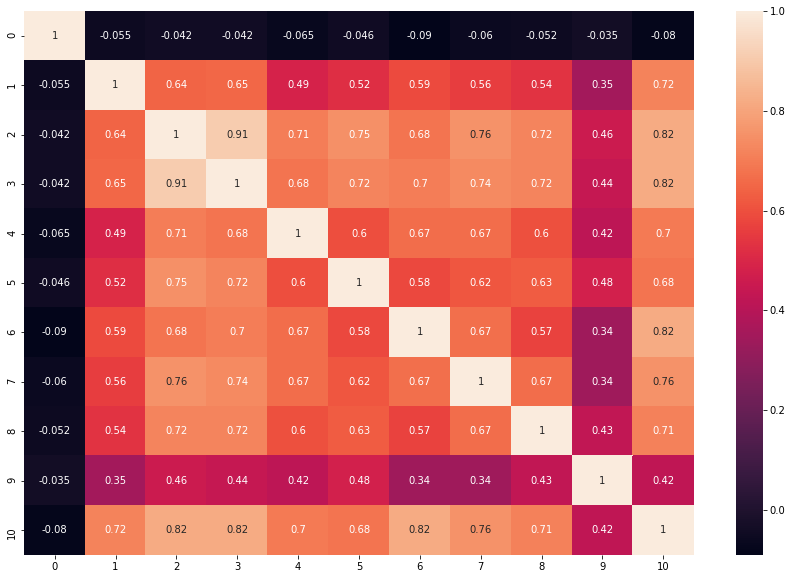

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

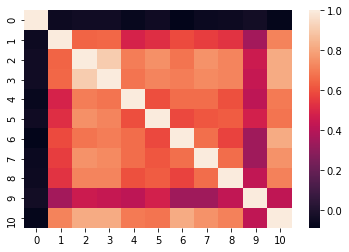

In [14]:
sns.heatmap(df.corr())

In [15]:
df.to_csv(r'preprocessed.csv')